6.November.2017

# FOV notebook


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

Then we import the functions used for the analysis

In [2]:
from config import functions as fov

With the data sets saved in the folder data, we can begin the analysis defining the wavelength and channel index.

In [94]:
config = dict()
config['channel'] = 1
config['channel_pixel_adj'] = 15 # pixels to change in the channel alignment direction
config['dead_fibre'] = [11, 21, 42, 48]
config['wavelength'] = 500
config['delta'] = 15

To analyse the data, we need to rearrange measurements of MUDIS and the robot. First we import the raw MUDIS files saved into the correct folder. 

In [90]:
# add files directories to a parameter
files = fov.files_data_dir(config)

In [91]:
# save the MUDIS channels values
fov.save2hdf5(files, config)

File 1 of 3 saved
File 2 of 3 saved
File 3 of 3 saved
Completed


In [92]:
# Rearrange the positions of the robot from the log file.
pos = fov.files_pos_dir(config)
fov.position_arrange(pos[0], config)

[[  0.5  10. ]
 [ 10.   10. ]
 [ 20.   10. ]]


In [96]:
# Rearrange the MUDIS and robot data into a common data structure.
fov.data_structure(config)

---
Then we import a data set using the next fucntion:

In [97]:
data = fov.read_data(config)
print('Data loaded, shape:', data[1].shape)

Data loaded, shape: (113, 992, 3)


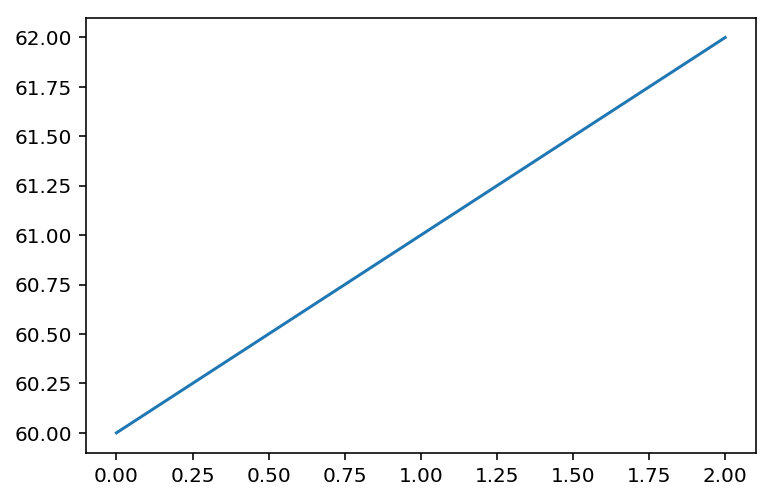

In [102]:
import matplotlib.pyplot as plt
plt.plot(data[1][1, 500, :])

A contour plot of the measured data is possible using the next function:

RuntimeError: Error in qhull Delaunay triangulation calculation: singular input data (exitcode=2); use python verbose option (-v) to see original qhull error.

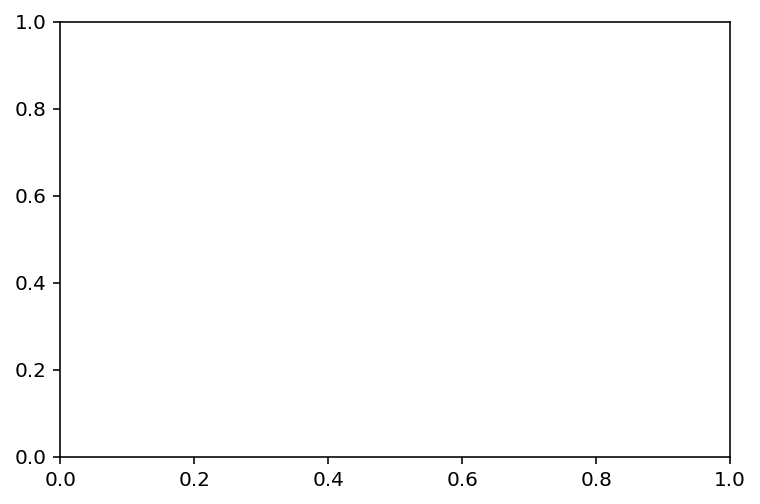

In [103]:
fov.plot_fov(data, config, add_points=True);

As we see in the figure above, the maximum of radiance is not aligned with the optical fiber. 
Now, we need to find the values and position of the FOV. Therefore we can use another function.

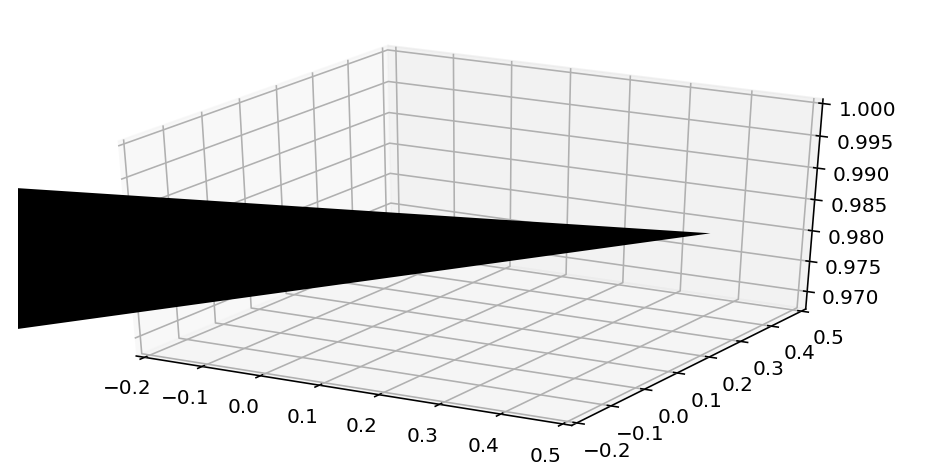

In [100]:
fov.plot_surf(data, config)